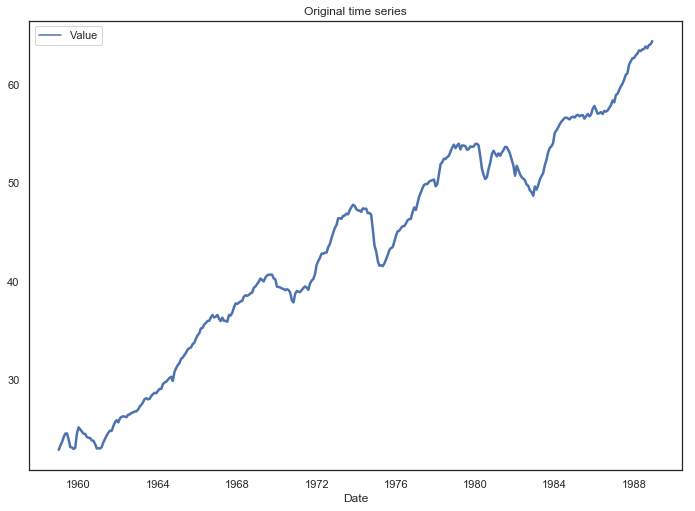

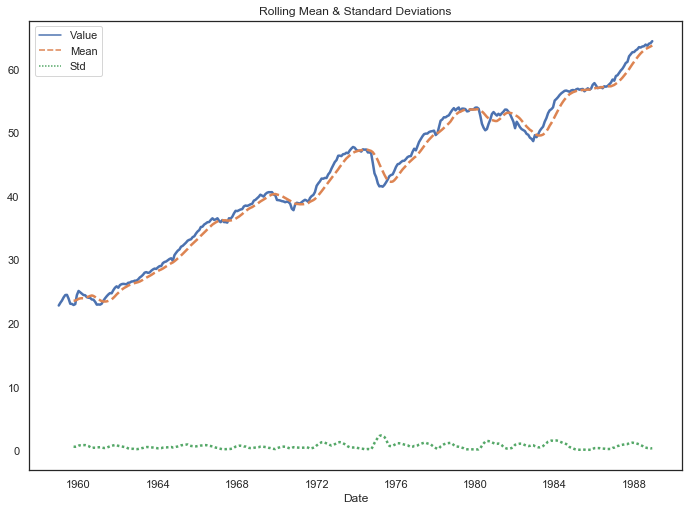

Results of Dickey-Fuller Test:
adf:  -0.2533911799284627
p-value:  0.9318510422993466
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Single roots exist, timeset is not stationary

Next step is decomposing timeset into trending, seasonal and residual components.
Lets do it in two ways:



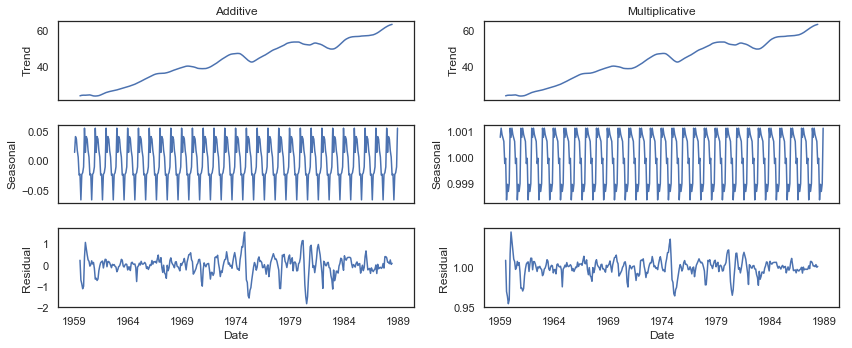

Now, lets fint out, whether these components are stationary
For additive model:
Trend  - N
Seasonal  - Y
Residual  - Y
For multiplicative model:
Trend  - N
Seasonal  - Y
Residual  - Y

Next step is finding the order of itegration
Order of itegration of this timeset is  1 



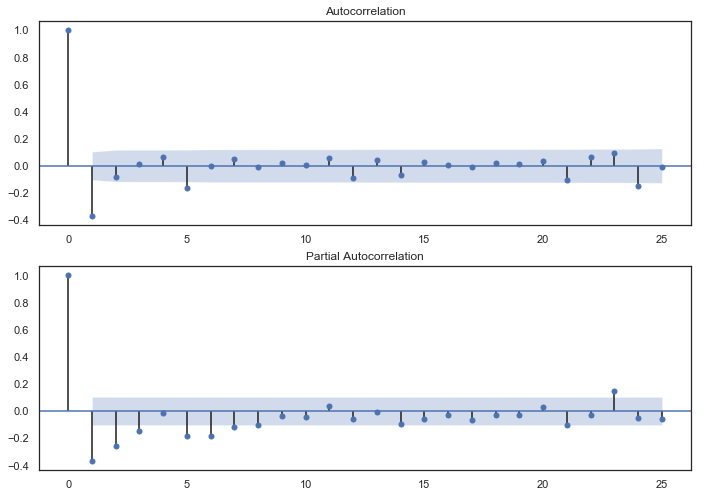

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.367
Method:                       css-mle   S.D. of innovations              0.338
Date:                Fri, 07 Dec 2018   AIC                            248.734
Time:                        15:40:55   BIC                            264.267
Sample:                             1   HQIC                           254.911
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1176      0.036      3.271      0.001       0.047       0.188
ar.L1.D.Value     0.6531      0.091      7.185      0.000       0.475       0.831
ma.L1.D.Value    -0.2984      0.115     

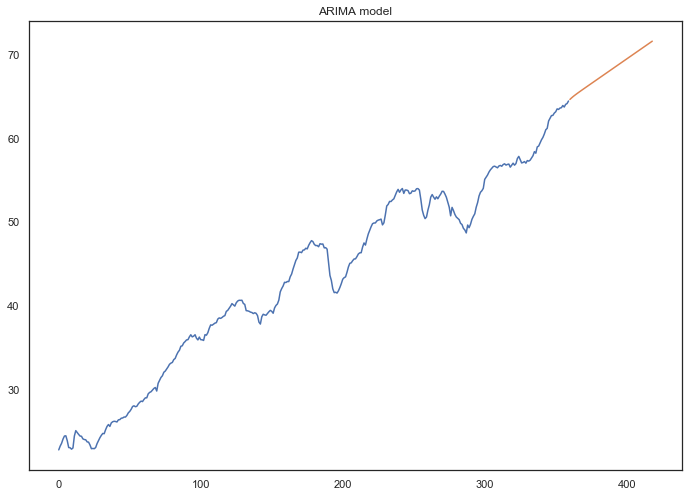

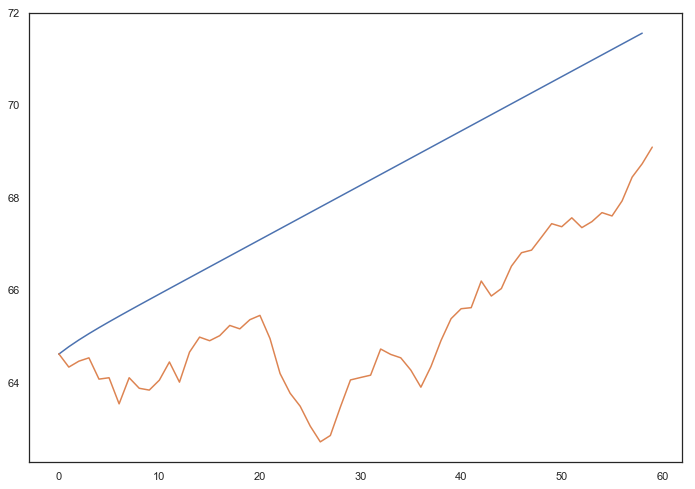

R2:  -3.0112909496657725 
AIC: 248.73365724475195


In [90]:
import datetime
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


def test(data):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(data)
    print('adf: ', dftest[0])
    print('p-value: ', dftest[1])
    print('Critical values: ', dftest[4])
    if dftest[0] > dftest[4]['5%']: 
        print('Single roots exist, timeset is not stationary')
    else:
        print('Single roots dont exist, timeset is stationary')
        
def st(data, type):
    dftest = adfuller(data)
    if dftest[0] > dftest[4]['5%']: 
        print(type, ' - N')
    else:
        print(type, ' - Y')


def plotseasonal(res, axes, type):
    res.trend.plot(ax = axes[0], legend = False)
    axes[0].set_ylabel('Trend')
    axes[0].set_title(type)
    res.seasonal.plot(ax = axes[1], legend = False)
    axes[1].set_ylabel('Seasonal')
    res.resid.plot(ax = axes[2], legend = False)
    axes[2].set_ylabel('Residual')
        
        
file = 'C:\\Users\\korotchuk\\pyth\\Untitled Folder\\training.xlsx'
a4_dims = (11.7, 8.27)
sns.set(style = 'white', 
        context = 'notebook', palette = 'deep',
       rc = {'figure.figsize': a4_dims})
dataset = pd.read_excel(file, 'Sheet1', parse_dates = ['Date'], 
                        dayfirst = True, index_col = 0)
plt.title('Original time series')
sns.lineplot(data = dataset, linewidth = 2.5)
plt.figure()
ds = dataset.assign(Mean = pd.Series.rolling(dataset, window = 10).mean(),
               Std = pd.Series.rolling(dataset, window = 10).std())

plt.title('Rolling Mean & Standard Deviations')
sns.lineplot(data = ds, linewidth = 2.5)
plt.show(block=False)
test(dataset.Value)
print('\nNext step is decomposing timeset into trending, seasonal and residual components.')
print('Lets do it in two ways:\n')
add = seasonal_decompose(dataset.Value, model='additive')
multi = seasonal_decompose(dataset.Value, model='multiplicative')

add.trend = add.trend.drop(add.trend.index[0:6])
add.trend = add.trend.drop(add.trend.index[348:354])
add.resid = add.resid.drop(add.resid.index[0:6])
add.resid = add.resid.drop(add.resid.index[348:354])
multi.trend = multi.trend.drop(multi.trend.index[0:6])
multi.trend = multi.trend.drop(multi.trend.index[348:354])
multi.resid = multi.resid.drop(multi.resid.index[0:6])
multi.resid = multi.resid.drop(multi.resid.index[348:354])

fig, axes = plt.subplots(ncols = 2, nrows = 3, sharex = True, figsize = (12,5))
plotseasonal(add, axes[:,0], 'Additive')
plotseasonal(multi, axes[:,1], 'Multiplicative')
plt.tight_layout()
plt.show(block=False)
print('Now, lets fint out, whether these components are stationary')
print('For additive model:')
st(add.trend, 'Trend')
st(add.seasonal, 'Seasonal')
st(add.resid, 'Residual')
print('For multiplicative model:')
st(multi.trend, 'Trend')
st(multi.seasonal, 'Seasonal')
st(multi.resid, 'Residual')

print('\nNext step is finding the order of itegration')
i = 1
dftest = adfuller(dataset.Value)
if dftest[0] > dftest[4]['5%']:
    differ = dataset.Value.diff(periods=1).dropna()
else:
    i = 0
k = 0
while i == 1:
    dftest = adfuller(differ)
    if dftest[0] <= dftest[4]['5%']:
        i = 0
    differ = differ.diff(periods=1).dropna()
    k = k + 1
if k:
    print("Order of itegration of this timeset is ", k,'\n')
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(differ, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(differ, lags=25, ax=ax2)
plt.show(block=False)


df = pd.read_excel(file)
df.Date = pd.to_datetime(df.Date)
file = 'C:\\Users\\korotchuk\\pyth\\Untitled Folder\\testing.xlsx'
df1 = pd.read_excel(file)
df1.Date = pd.to_datetime(df1.Date)
model_arima = sm.tsa.ARIMA(df.Value, order = (1, 1, 1)).fit()
print (model_arima.summary())
result = model_arima.predict(start = 360, end = 418,
                       typ = 'levels')
plt.figure()
df.Value.plot()
result.plot()
plt.title("ARIMA model")
plt.show()
res1 = result.values
res2 = pd.DataFrame(res1)
res2.plot(legend = False)
df1.Value.plot()
plt.show()
r2 = r2_score(df1.Value[1:], res2) 
print("R2: ", r2, "\nAIC:", model_arima.aic)